# Содержание #
<div>
    <ol>
        <li>
            <a href="#import_libs">Импорт библиотек</a>
        </li>
        <li>
            <a href="#data">Данные</a>
        </li>
        <ul>
            <li>
                <a href="#data_load">Загрузка данных</a>
            </li>
            <li>
                <a href="#data_view">Первичный осмотр данных</a>
            </li>
        </ul>
        <li>
            <a href="#prepare">Предобработка данных</a>
        </li>
        <ul>
            <li>
                <a href="#prepare_calls">Предобработка данных calls</a>
            </li>
            <li>
                <a href="#prepare_internet">Предобработка данных internet</a>
            </li>
            <li>
                <a href="#prepare_messages">Предобработка данных messages</a>
            </li>
            <li>
                <a href="#prepare_users">Предобработка данных users</a>
            </li>
        </ul>
        <li>
            <a href="#calculations">Расчет</a>
        </li>
        <ul>
            <li>
                <a href="#calc_calls_minutes_bills">Расчет количества звонков, израсходованных минут, звонковой выручки</a>
            </li>
            <li>
                <a href="#calc_messages_bills">Расчет количества отправленных сообщений, выручки от сообщений</a>
            </li>
            <li>
                <a href="#calc_internet_bills">Расчет количества потребленного трафика, выручка от интренет-трафика</a>
            </li>
            <li>
                <a href="#calc_total_revenue">Расчет выручки</a>
            </li>
        </ul>
        <li>
            <a href="#analyze">Анализ</a>
        </li>
        <ul>
            <li>
                <a href="#analyze_stats">Статистические данные тарифных планов</a>
            </li>
            <li>
                <a href="#analyze_calls_hist">Гистограмма длительности звонков</a>
            </li>
            <li>
                <a href="#analyze_messages_hist">Гистограмма количества сообщений</a>
            </li>
            <li>
                <a href="#analyze_internet_hist">Гистограмма интренет-трафика</a>
            </li>
            <li>
                <a href="#analyze_revenue_hist">Гистограмма выручки</a>
            </li>
        </ul>
        <li>
            <a href="#hypothesis">Проверка гипотез</a>
        </li>
        <ul>
            <li>
                <a href="#hypothesis_1">Гипотеза 1: выручка тарифных планов</a>
            </li>
            <li>
                <a href="#hypothesis_2">Гипотеза 2: выручка регионов</a>
            </li>
        </ul>
        <li>
            <a href="#summary">Вывод</a>
        </li>
    </ol>
</div>

<a id='import_libs'></a>
# Импорт библиотек #

In [1]:
import numpy as np
import pandas as pd
from IPython.core.display import display
from scipy import stats as st
import math as mt
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

<a id='data'></a>
# Данные #

<a id='data_load'></a>
## Загрузка данных ##

In [2]:
calls = pd.read_csv(filepath_or_buffer='datasets/calls.csv')
internet = pd.read_csv(filepath_or_buffer='datasets/internet.csv')
messages = pd.read_csv(filepath_or_buffer='datasets/messages.csv')
tariffs = pd.read_csv(filepath_or_buffer='datasets/tariffs.csv')
users = pd.read_csv(filepath_or_buffer='datasets/users.csv')

<a id='data_view'></a>
## Первичный осмотр данных ##

In [3]:
display(calls)
calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
display(internet)
internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [5]:
display(messages)
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [6]:
display(tariffs)
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [7]:
display(users)
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


## Результаты первичного осмотра ##
1. calls:
    - id:
        * значение обрезать '_', идентификатор абонента указан в другом столбце
        * привести к типу int
    - call_date:
        * привести к типу date
    - duration:
        * округлить до большего целого
        * привести к типу int
2. internet:
    - 'unnamed:0' - удалить
    - id:
        * значение обрезать '_', идентификатор абонента указан в другом столбце
        * привести к типу int
    - session_date:
        * привести к типу date
3. messages:
    - id:
        * значение обрезать '_', идентификатор абонента указан в другом столбце
        * привести к типу int
    - message_date:
        * привести к типу date
4. users:
    - churn_date
        * привести к типу date
        * пропуски оставить
    - city:
        * удалить лишние символы
        * преобразовать в нижний регистр
    - first_name:
        * удалить лишние символы
        * преобразовать в нижний регистр
    - last_name:
        * удалить лишние символы
        * преобразовать в нижний регистр
    - reg_date:
        * привести к типу date
5. собрать данные абонентов и условий тарифного плана в одну таблицу

<a id='prepare'></a>
# Предобработка данных #

<a id='prepare_calls'></a>
## Предобработка данных calls ##

In [8]:
calls['id'] = calls['id'].str.split('_', expand=True)[1].astype('int')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['duration'] = calls['duration'].apply(mt.ceil).astype('int')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  int32         
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int32         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int32(2), int64(1)
memory usage: 4.6 MB


In [9]:
calls.duplicated().sum()

0

<a id='prepare_internet'></a>
## Предобработка данных internet ##

In [10]:
internet = internet.drop(columns=['Unnamed: 0'])
internet['id'] = internet['id'].str.split('_', expand=True)[1].astype('int')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  int32         
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1)
memory usage: 4.0 MB


In [11]:
internet.duplicated().sum()

0

<a id='prepare_messages'></a>
## Предобработка данных messages ##

In [12]:
messages['id'] = messages['id'].str.split('_', expand=True)[1].astype('int')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  int32         
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1)
memory usage: 2.3 MB


In [13]:
messages.duplicated().sum()

0

<a id='prepare_users'></a>
## Предобработка данных users ##

In [14]:
users = users.rename(columns={'tariff':'tariff_name'})
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d', errors='coerce')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

for column in ['city', 'first_name', 'last_name']:
    users[column] = users[column].str.strip()
    users[column] = users[column].str.lower()

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      500 non-null    int64         
 1   age          500 non-null    int64         
 2   churn_date   38 non-null     datetime64[ns]
 3   city         500 non-null    object        
 4   first_name   500 non-null    object        
 5   last_name    500 non-null    object        
 6   reg_date     500 non-null    datetime64[ns]
 7   tariff_name  500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [15]:
users_data = users.merge(tariffs, on='tariff_name')
users_data

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1003,23,NaT,москва,белла,белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
2,1004,68,NaT,новокузнецк,татьяна,авдеенко,2018-05-14,ultra,1000,30720,3000,1950,150,1,1
3,1013,36,NaT,иваново,борис,андреенко,2018-11-14,ultra,1000,30720,3000,1950,150,1,1
4,1016,58,NaT,омск,марица,сазонова,2018-11-21,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1494,62,NaT,омск,ренат,андропов,2018-08-17,smart,50,15360,500,550,200,3,3
496,1496,36,NaT,вологда,трифон,блохин,2018-01-27,smart,50,15360,500,550,200,3,3
497,1497,32,NaT,челябинск,каролина,агеева,2018-10-09,smart,50,15360,500,550,200,3,3
498,1498,68,2018-10-25,владикавказ,всеволод,акимчин,2018-07-19,smart,50,15360,500,550,200,3,3


In [16]:
users.duplicated().sum()

0

In [17]:
users_data.duplicated().sum()

0

# Результаты предобработки данных #
1. calls:
    - ['id']:
        * лишние значения удалены
        * приведен к типу 'int'
    - ['call_date']:
        * приведен к типу 'datetime'
    - ['duration']:
        * округлен до большего целого
        * приведен к типу 'int'
    - дубликаты отсутствуют
2. internet:
    - ['Unnamed: 0']:
        * удален
    - ['id']:
        * лишние данные удалены
        * приведен к типу 'int'
    - ['session_date']:
        * приведен к типу 'datetime'
    - дубликаты отсутствуют
3. messages:
    - ['id']:
        * лишние значения удалены
        * приведен к типу 'int'
    - ['message_date']:
        * приведен к типу 'datetime'
    - дубликаты отсутствуют
4. users:
    - ['churn_date']:
        * приведен к типу 'datetime'
    - ['reg_date']:
        * приведен к типу 'datetime'
    - ['city', 'first_name', 'last_name']:
        * лишние символы удалены
        * преобразованы в нижний регистр
    - ['tariff']:
        * переименован в ['tariff_name']
    - дубликаты отсутствуют
5. создана таблица users_data содержащая данные об абонентах и условиях тарифного плана:
    - дубликаты отсутствуют

<a id='calculations'></a>
# Расчет #

<a id='calc_calls_minutes_bills'></a>
## Расчет количества звонков, израсходованных минут, звонковой выручки ##

In [18]:
calls['month'] = calls['call_date'].dt.month
calls_pivot = pd.pivot_table(data=calls,
                             index=['user_id','month'],
                             values='duration',
                             aggfunc=['sum', 'count'])
calls_pivot.columns = ['calls_durations','calls_count']
calls_pivot.reset_index(inplace=True)
calls_pivot

,user_id,month,calls_durations,calls_count
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58
...,...,...,...,...
3169,1498,10,247,41
3170,1499,9,70,9
3171,1499,10,449,68
3172,1499,11,612,74


In [19]:
calls_pivot.shape

(3174, 4)

In [20]:
revenue_data = users_data.merge(calls_pivot, on='user_id', how='left')

In [21]:
def calls_revenue(rec):
    if rec['calls_durations'] > rec['minutes_included']:
        return (rec['calls_durations'] - rec['minutes_included']) * rec['rub_per_minute']
    else: return 0

In [22]:
revenue_data['calls_revenue'] = revenue_data.apply(calls_revenue, axis=1)

In [23]:
revenue_data

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,calls_durations,calls_count,calls_revenue
0,1000,52,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,5.0,159.0,22.0,0.0
1,1000,52,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,6.0,172.0,43.0,0.0
2,1000,52,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,7.0,340.0,47.0,0.0
3,1000,52,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,8.0,408.0,52.0,0.0
4,1000,52,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,9.0,466.0,58.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,1498,68,2018-10-25,владикавказ,всеволод,акимчин,2018-07-19,smart,50,15360,500,550,200,3,3,10.0,247.0,41.0,0.0
3178,1499,35,NaT,пермь,гектор,корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,9.0,70.0,9.0,0.0
3179,1499,35,NaT,пермь,гектор,корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,10.0,449.0,68.0,0.0
3180,1499,35,NaT,пермь,гектор,корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,11.0,612.0,74.0,336.0


<a id='calc_messages_bills'></a>
## Расчет количества отправленных сообщений, выручки от сообщений ##

In [24]:
messages['month'] = messages['message_date'].dt.month
messages_pivot = pd.pivot_table(data=messages,
                                index=['user_id', 'month'],
                                values='message_date',
                                aggfunc='count')
messages_pivot.columns = ['messages_count']
messages_pivot.reset_index(inplace=True)
messages_pivot

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [25]:
messages_pivot.shape

(2717, 3)

In [26]:
revenue_data = revenue_data.merge(messages_pivot, on=['user_id','month'], how='left')
revenue_data.shape

(3182, 20)

In [27]:
def messages_revenue(rec):
    if rec['messages_count'] > rec['messages_included']:
        return (rec['messages_count'] - rec['messages_included']) * rec['rub_per_message']
    else: return 0

In [28]:
revenue_data['messages_revenue'] = revenue_data.apply(messages_revenue, axis=1)
revenue_data

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,calls_durations,calls_count,calls_revenue,messages_count,messages_revenue
0,1000,52,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,1000,30720,...,1950,150,1,1,5.0,159.0,22.0,0.0,22.0,0.0
1,1000,52,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,1000,30720,...,1950,150,1,1,6.0,172.0,43.0,0.0,60.0,0.0
2,1000,52,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,1000,30720,...,1950,150,1,1,7.0,340.0,47.0,0.0,75.0,0.0
3,1000,52,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,1000,30720,...,1950,150,1,1,8.0,408.0,52.0,0.0,81.0,0.0
4,1000,52,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,1000,30720,...,1950,150,1,1,9.0,466.0,58.0,0.0,57.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,1498,68,2018-10-25,владикавказ,всеволод,акимчин,2018-07-19,smart,50,15360,...,550,200,3,3,10.0,247.0,41.0,0.0,42.0,0.0
3178,1499,35,NaT,пермь,гектор,корнилов,2018-09-27,smart,50,15360,...,550,200,3,3,9.0,70.0,9.0,0.0,11.0,0.0
3179,1499,35,NaT,пермь,гектор,корнилов,2018-09-27,smart,50,15360,...,550,200,3,3,10.0,449.0,68.0,0.0,48.0,0.0
3180,1499,35,NaT,пермь,гектор,корнилов,2018-09-27,smart,50,15360,...,550,200,3,3,11.0,612.0,74.0,336.0,59.0,27.0


<a id='calc_internet_bills'></a>
## Расчет количества потребленного трафика, выручка от интренет-трафика ##

In [29]:
internet['month'] = internet['session_date'].dt.month
internet_pivot = pd.pivot_table(data=internet,
                                index=['user_id', 'month'],
                                values='mb_used',
                                aggfunc='sum')
internet_pivot.columns = ['gb_used']
internet_pivot['gb_used'] = internet_pivot['gb_used'] / 1024
internet_pivot['gb_used'] = internet_pivot['gb_used'].apply(mt.ceil)
internet_pivot.reset_index(inplace=True)
internet_pivot

,user_id,month,gb_used
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15
...,...,...,...
3198,1498,10,21
3199,1499,9,2
3200,1499,10,18
3201,1499,11,18


In [30]:
internet_pivot.shape

(3203, 3)

In [31]:
revenue_data = revenue_data.merge(internet_pivot, on=['user_id', 'month'], how='left')
revenue_data.shape

(3182, 22)

In [32]:
def interet_revenue(rec):
    if rec['gb_used'] > rec['mb_per_month_included'] / 1024:
        return (rec['gb_used'] - rec['mb_per_month_included'] / 1024) * rec['rub_per_gb']
    else: return 0

<a id='calc_total_revenue'></a>
## Расчет выручки ##

In [33]:
revenue_data['internet_revenue'] = revenue_data.apply(interet_revenue, axis=1)

In [34]:
revenue_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3182 entries, 0 to 3181
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3182 non-null   int64         
 1   age                    3182 non-null   int64         
 2   churn_date             189 non-null    datetime64[ns]
 3   city                   3182 non-null   object        
 4   first_name             3182 non-null   object        
 5   last_name              3182 non-null   object        
 6   reg_date               3182 non-null   datetime64[ns]
 7   tariff_name            3182 non-null   object        
 8   messages_included      3182 non-null   int64         
 9   mb_per_month_included  3182 non-null   int64         
 10  minutes_included       3182 non-null   int64         
 11  rub_monthly_fee        3182 non-null   int64         
 12  rub_per_gb             3182 non-null   int64         
 13  rub

In [35]:
revenue_data['total_revenue'] = revenue_data['internet_revenue'] + revenue_data['calls_revenue'] + revenue_data['messages_revenue'] + revenue_data['rub_monthly_fee']

In [36]:
revenue_data[['total_revenue', 'internet_revenue', 'calls_revenue', 'messages_revenue', 'rub_monthly_fee']].sample(5)

,total_revenue,internet_revenue,calls_revenue,messages_revenue,rub_monthly_fee
1633,1550.0,1000.0,0.0,0.0,550
2784,1350.0,800.0,0.0,0.0,550
2786,1150.0,600.0,0.0,0.0,550
2229,1907.0,1000.0,357.0,0.0,550
1311,1550.0,1000.0,0.0,0.0,550


# Итоги проведения расчетов #
1. звонки
    - расчет количества звонков сохранен в revenue_data['calls_count']
    - длительность совершенных звонков сохранена в revenue_data['calls_durations']
    - звонковая выручка сохранена в revenue_data['calls_revenue']
2. соощения:
    - расчет количества сообщений сохранен в revenue_data['messages_count']
    - выручка от сообщений сохранена в revenue_data['messages_revenue']
3. интернет:
    - расчет потребленного объема трафика сохранен в revenue_data['gb_used']
    - выручка от интернет-трафика сохранена в revenue_data['internet_revenue']
4. итоговая выручка сохранена в revenue_data['total_revenue']

<a id='analyze'></a>
# Анализ #

<a id='analyze_stats'></a>
## Статистические данные тарифных планов ##

In [37]:
stat_data = pd.pivot_table(data=revenue_data,
                           index=revenue_data['tariff_name'],
                           values=['calls_durations', 'messages_count', 'gb_used', 'total_revenue'],
                           aggfunc=[lambda x:np.std(x,ddof=1)])
stat_data = stat_data.rename(columns={'<lambda>':'std'})

stat_data = stat_data.merge(pd.pivot_table(data=revenue_data,
                           index=revenue_data['tariff_name'],
                           values=['calls_durations', 'messages_count', 'gb_used', 'total_revenue'],
                           aggfunc=[lambda x:np.var(x,ddof=1)]),
                on='tariff_name')
stat_data = stat_data.rename(columns={'<lambda>':'var'})

stat_data = stat_data.merge(pd.pivot_table(data=revenue_data,
                           index=revenue_data['tariff_name'],
                           values=['calls_durations', 'messages_count', 'gb_used', 'total_revenue'],
                           aggfunc=[lambda x:np.mean(x)]),
                on='tariff_name')
stat_data = stat_data.rename(columns={'<lambda>':'mean'})
stat_data

std                                         \
            calls_durations   gb_used messages_count total_revenue   
tariff_name                                                          
smart            189.325618  5.743447      26.817396    819.052589   
ultra            306.925754  9.735407      44.716597    378.351486   

                        var                                           \
            calls_durations    gb_used messages_count  total_revenue   
tariff_name                                                            
smart          35844.189551  32.987179     719.172709  670847.143071   
ultra          94203.418396  94.778156    1999.574067  143149.847195   

                       mean                                          
            calls_durations    gb_used messages_count total_revenue  
tariff_name                                                          
smart            419.062978  16.337084      38.747390   1290.225169  
ultra            545.451104  19.695005      61.195538   2070.219436

<a id='analyze_calls_hist'></a>
## Гистограмма длительности звонков ##

Text(0.5, 1.0, 'Гистограмма длительности звонков')

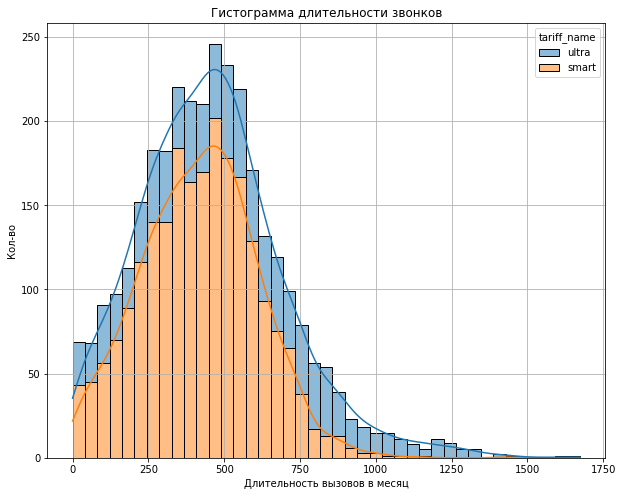

In [38]:
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(data=revenue_data,
             x='calls_durations',
             hue='tariff_name',
             ax=ax,
             multiple='stack',
             kde=True)
plt.grid()
plt.xlabel('Длительность вызовов в месяц')
plt.ylabel('Кол-во')
plt.title('Гистограмма длительности звонков')

<a id='analyze_messages_hist'></a>
## Гистограмма количества сообщений ##

Text(0.5, 1.0, 'Гистограмма количества сообщений')

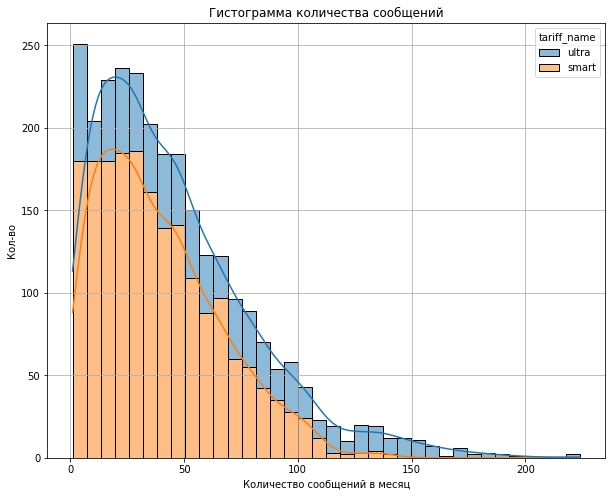

In [39]:
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(data=revenue_data,
             x='messages_count',
             hue='tariff_name',
             ax=ax,
             multiple='stack',
             kde=True)
plt.grid()
plt.xlabel('Количество сообщений в месяц')
plt.ylabel('Кол-во')
plt.title('Гистограмма количества сообщений')

<a id='analyze_internet_hist'></a>
## Гистограмма интренет-трафика ##

Text(0.5, 1.0, 'Гистограмма интренет-трафика')

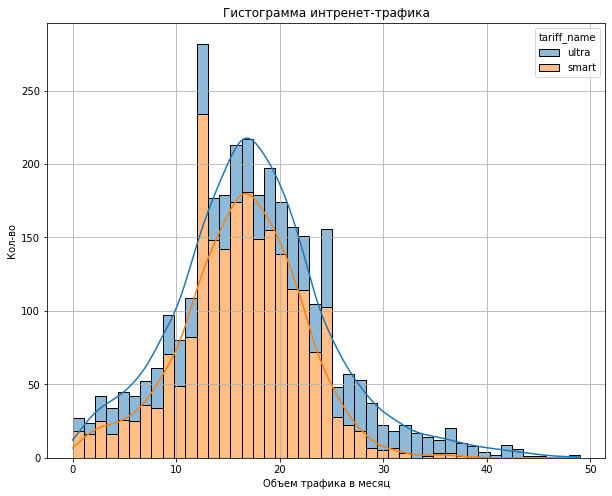

In [40]:
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(data=revenue_data,
             x='gb_used',
             hue='tariff_name',
             ax=ax,
             multiple='stack',
             kde=True)
plt.grid()
plt.xlabel('Объем трафика в месяц')
plt.ylabel('Кол-во')
plt.title('Гистограмма интренет-трафика')

<a id='analyze_revenue_hist'></a>
## Гистограмма выручки ##

Text(0.5, 1.0, 'Гистограмма месячной выручки')

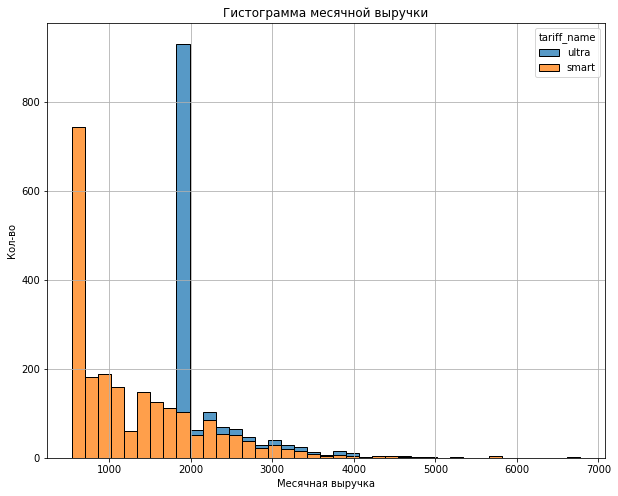

In [41]:
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(data=revenue_data,
             x='total_revenue',
             hue='tariff_name',
             ax=ax,
             multiple='stack')
plt.grid()
plt.xlabel('Месячная выручка')
plt.ylabel('Кол-во')
plt.title('Гистограмма месячной выручки')

# Результаты статистического анализа #
1. Средние значения объема услуг потребляемых абонентами:
    Тариф "Smart":
    - звонки: 419 мин.
    - сообщения: 39 шт.
    - интренет: 17 Gb
    Тариф "Ultra":
    - звонки: 545 мин.
    - сообщения: 62 шт.
    - интернет: 20 Gb
2. Гистограмма звонков:
    - для обоих тарифов скошена вправо
    - длительность звонков абонентов ТП "ultra" больше
3. Гистограмма сообщений:
    - для обоих тарифов скошена вправо
    - абоненты ТП "ultra" отправляют больше сообщений
4. Гистограмма интернет-трафика:
    - данные рспределены почти нормально
    - абоненты ТП "ultra" потребляют больше
5. Гистограмма месячной выручки:
    - выручка абонентов ТП "ultra" выше

<a id='hypothesis'></a>
# Проверка гипотез #

<a id='hypothesis_1'></a>
## Гипотеза 1: выручка тарифных планов ##
$ H_0 $: средняя выручка абонентов тарифов «Ультра» и «Смарт» одинакова.

$ H_1 $: средняя выручка абонентов тарифов «Ультра» и «Смарт» различаются.

In [42]:
print(revenue_data.query('tariff_name == "smart"').shape[0])
print(revenue_data.query('tariff_name == "ultra"').shape[0])

2225
957


In [43]:
alpha = 0.05
result = st.ttest_ind(revenue_data.query('tariff_name == "smart"')['total_revenue'],
                      revenue_data.query('tariff_name == "ultra"')['total_revenue'],
                      equal_var=False)
print(result.pvalue)
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
    print(f'''Средняя выручка ТП "Ultra": {revenue_data.query('tariff_name == "ultra"')['total_revenue'].mean() :.2}.
Средняя выручка ТП "Smart": {revenue_data.query('tariff_name == "smart"')['total_revenue'].mean() :.2}''')
else:
    print("Не получилось отвергнуть нулевую гипотезу")

2.796424815525196e-246
Отвергаем нулевую гипотезу
Средняя выручка ТП "Ultra": 2.1e+03.
Средняя выручка ТП "Smart": 1.3e+03


<a id='hypothesis_2'></a>
## Гипотеза 2: выручка регионов ##
$ H_0 $: средняя выручка абонентов Москвы и регионов одинакова.

$ H_1 $: средняя выручка абонентов Москвы и регионов различаются.

In [44]:
print(revenue_data.query('city == "москва"').shape[0])
print(revenue_data.query('city != "москва"').shape[0])

610
2572


In [45]:
result = st.ttest_ind(revenue_data.query('city == "москва"')['total_revenue'],
                      revenue_data.query('city != "москва"')['total_revenue'],
                      equal_var=False)
print(result.pvalue)
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
    print(f'''Средняя выручка ТП "Ultra": {revenue_data.query('city == "москва"')['total_revenue'].mean() :.2}.
Средняя выручка ТП "Smart": {revenue_data.query('city != "москва"')['total_revenue'].mean() :.2}''')
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.4452390325541491
Не получилось отвергнуть нулевую гипотезу


<a id='summary'></a>
# Вывод #
1. выручка ТП "Ультра" больше. рекламную компанию стоит сфокусировать на указанном ТП.
2. выручка в регионах не отличается от выручке в Москве. масштабы рекламной компании в Москве и регионах должны быть одинаковы.